#### ADS1 Assignment 2

**Tanvir Ahmed, 20075186**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Using WBGAPI importing World Bank data on climate change

In [2]:
import wbgapi as wb         #importing wbgapi as wb 

# To install this API, please run pip install wbgapi

In [3]:
# Indicator ID for Total greenhouse gas emissions (kt of CO2 equivalent) is 'EN.ATM.GHGT.KT.CE'

greenhouse_emission_ind = 'EN.ATM.GHGT.KT.CE' #assigning the ID to a variable

In [4]:
def wb_data(indicator_id):
    """
    This function imports data from the World Bank website for the selected
    indicator and saves as a dataframe in the World Bank data format and it's transposed format. 
    The years are between 1950 and 2021 with 5 years increment.  
    Argument = indicator ID as string
    """
    
    df = wb.data.DataFrame(indicator_id, time=range(1950, 2021, 5))
    
    df.index.name = 'Country'
    df.columns.name = 'Year'
    df.columns = df.columns.str.replace("YR","")
    
    return(df, df.T)

In [5]:
df_CO2 = wb_data(greenhouse_emission_ind)

In [6]:
df_CO2[0].head(5) # The first dataframe in the World Bank format

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,NaN,NaN,2.512439e+06,1.908922e+06,2.213255e+06,1.559561e+06,838050.0,895540.0,948360.0,1154760.0,1335490.0,1436770.0,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,15180.0,13480.0,15080.0,17400.0,44910.0,93730.0,NaN
AFW,NaN,NaN,6.327455e+05,6.007661e+05,8.132658e+05,6.818932e+05,398170.0,526710.0,553740.0,650720.0,690440.0,805370.0,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,42180.0,48460.0,49590.0,67230.0,84120.0,90620.0,NaN


In [7]:
df_CO2[1].head(5) # The second dataframe with countries as columns

Country,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,2.512439e+06,NaN,632745.499853,NaN,NaN,NaN,552362.062026,NaN,NaN,...,NaN,NaN,NaN,2.705717e+07,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,1.908922e+06,NaN,600766.122089,NaN,NaN,NaN,683966.235399,NaN,NaN,...,NaN,NaN,NaN,2.824575e+07,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,2.213255e+06,NaN,813265.777979,NaN,NaN,NaN,927714.236940,NaN,NaN,...,NaN,NaN,NaN,3.279410e+07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# The country codes in the dataframes don't make proper sense we need to reset the index with proper country names

# The url below contains the country names with their respective codes

url = 'https://docs.google.com/spreadsheets/d/1-HxLssAd2glfU40FWuccMw8758zrJyon6H6qkMjLeZU/edit#gid=0'

url_readable = url.replace('/edit#gid=', '/export?format=csv&gid=')

country_names = pd.read_csv(url_readable)

country_names

,Country Name,Country Code
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO
...,...,...
261,Kosovo,XKX
262,"Yemen, Rep.",YEM
263,South Africa,ZAF
264,Zambia,ZMB


In [9]:
def country_code_to_name(df):
    """
    Takes in a dataframe with  country codes as index and 
    changes the index to country names.
    """
    df.index = country_names['Country Name']
    
    return(df)

In [10]:
country_code_to_name(df_CO2[0])

df_CO2[0].head(5)

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,NaN,NaN,2.512439e+06,1.908922e+06,2.213255e+06,1.559561e+06,838050.0,895540.0,948360.0,1154760.0,1335490.0,1436770.0,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,15180.0,13480.0,15080.0,17400.0,44910.0,93730.0,NaN
Africa Western and Central,NaN,NaN,6.327455e+05,6.007661e+05,8.132658e+05,6.818932e+05,398170.0,526710.0,553740.0,650720.0,690440.0,805370.0,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,42180.0,48460.0,49590.0,67230.0,84120.0,90620.0,NaN


In [11]:
df_CO2[1].columns = country_names['Country Name']
df_CO2[1].head(5)

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,2.512439e+06,NaN,632745.499853,NaN,NaN,NaN,552362.062026,NaN,NaN,...,NaN,NaN,NaN,2.705717e+07,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,1.908922e+06,NaN,600766.122089,NaN,NaN,NaN,683966.235399,NaN,NaN,...,NaN,NaN,NaN,2.824575e+07,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,2.213255e+06,NaN,813265.777979,NaN,NaN,NaN,927714.236940,NaN,NaN,...,NaN,NaN,NaN,3.279410e+07,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
countries_of_interest = ['Bangladesh', 'Brazil', 'Canada', 'China', 'Ecuador', 'France', 'India', 
                         'Nigeria', 'Russia', 'South Africa', 'Sweden', 'United Kingdom', 'United States']

In [21]:
# China, United States, India, Russia and Brazil are the most CO2 producing countries from the list.

In [22]:
# Constructing a dataframe with climate change indicators of interest for the listed countries.

rural_pop = 'SP.RUR.TOTL.ZS'          # Rural population (% of total population)

urban_pop = 'SP.URB.TOTL.IN.ZS'       # Urban population (% of total population)

forest_area = 'AG.LND.FRST.ZS'        # Forest area (% of land area)

arable_land = 'AG.LND.ARBL.ZS'        # Arable land (% of land area)

manufacturing = 'NV.IND.MANF.ZS'      # Manufacturing, value added (% of GDP)

gdp = 'NY.GDP.MKTP.CD'                # GDP (current USD)  


In [23]:
df_r = wb_data(rural_pop)

country_code_to_name(df_r[0])

df_rural = df_r[0].loc[countries_of_interest]

df_rural.head()

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,,
Bangladesh,94.865,93.789,92.407,90.164,85.149,82.504,80.189,78.307,76.410,73.191,69.538,65.692,61.823
Brazil,53.861,48.963,44.091,39.211,34.532,30.138,26.078,22.390,18.808,17.166,15.665,14.230,12.927
Canada,30.939,27.108,24.346,24.389,24.337,23.646,23.418,22.325,20.522,19.878,19.063,18.741,18.438
China,83.797,81.914,82.600,82.600,80.642,77.126,73.558,69.039,64.123,57.478,50.774,44.500,38.572
Ecuador,66.122,63.360,60.722,57.637,53.039,48.785,44.910,42.234,39.701,38.289,37.310,36.602,35.834


In [24]:
df_u = wb_data(urban_pop)

country_code_to_name(df_u[0])

df_urban = df_u[0].loc[countries_of_interest]

df_urban.head()

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,,
Bangladesh,5.135,6.211,7.593,9.836,14.851,17.496,19.811,21.693,23.590,26.809,30.462,34.308,38.177
Brazil,46.139,51.037,55.909,60.789,65.468,69.862,73.922,77.610,81.192,82.834,84.335,85.770,87.073
Canada,69.061,72.892,75.654,75.611,75.663,76.354,76.582,77.675,79.478,80.122,80.937,81.259,81.562
China,16.203,18.086,17.400,17.400,19.358,22.874,26.442,30.961,35.877,42.522,49.226,55.500,61.428
Ecuador,33.878,36.640,39.278,42.363,46.961,51.215,55.090,57.766,60.299,61.711,62.690,63.398,64.166


In [59]:
df_f = wb_data(forest_area)

country_code_to_name(df_f[0])

df_forest = df_f[0].loc[countries_of_interest]

df_forest.drop(['1960','1965','1970','1975','1980','1985'], axis=1).head(5) # removed the years without proper data

Year,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,
Bangladesh,14.752478,14.752470,14.752463,14.629601,14.506738,14.468772,14.468772
Brazil,70.458021,68.196190,65.934359,63.570920,61.207482,60.286715,59.417478
Canada,38.845512,38.819247,38.792982,38.766226,38.739471,38.716438,38.695513
China,16.673325,17.726847,18.780497,20.033048,21.285597,22.313094,23.340596
Ecuador,52.854392,51.225816,55.284667,53.870772,52.456877,51.615316,50.321429


In [26]:
df_a = wb_data(arable_land)

country_code_to_name(df_a[0])

df_arable = df_a[0].loc[countries_of_interest]

df_arable.drop(['1960'], axis=1).head()

Year,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,
Bangladesh,67.427211,67.888146,70.246601,70.069909,70.308059,72.643466,64.561727,64.146885,60.774372,59.852501,59.401091,NaN
Brazil,3.080231,3.374674,4.046594,5.688611,6.330081,5.663940,5.092401,5.437573,5.782746,6.150292,6.522743,NaN
Canada,4.228389,4.294419,4.356211,4.494517,4.615201,4.613974,4.585309,4.569805,4.418672,4.203516,4.269881,NaN
China,10.871221,10.617526,10.375514,10.286715,12.821139,13.207996,12.757302,12.697062,12.866959,12.877841,12.689357,NaN
Ecuador,6.194914,6.231036,6.212975,5.570004,5.743390,5.793960,5.685595,6.506684,5.218232,4.776937,4.300209,NaN


In [60]:
df_m = wb_data(manufacturing)

country_code_to_name(df_m[0])

df_manufacturing = df_m[0].loc[countries_of_interest]

df_manufacturing.head()

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,,
Bangladesh,5.309911,5.445474,5.804683,7.042276,14.487485,14.458070,13.239219,15.900007,14.035316,14.743999,16.121228,16.788674,18.511813
Brazil,22.619394,22.644860,24.634833,25.584923,29.949257,32.471703,22.828130,14.542279,13.134660,14.738281,12.721860,10.520937,9.769890
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.024437,13.374762,10.027154,9.975423,NaN
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.093924,31.612822,28.951671,26.175907
Ecuador,19.712241,20.402875,23.191066,18.842139,18.339520,21.616179,22.330935,22.164570,22.379389,14.128212,13.401890,14.423508,15.570442


In [28]:
df_g = wb_data(gdp)

country_code_to_name(df_g[0])

df_gdp = df_g[0].loc[countries_of_interest]

df_gdp.drop(['1960','1965','1970','1975','1980','1985', '2020'], axis=1).head()

Year,1990,1995,2000,2005,2010,2015
Country Name,,,,,,
Bangladesh,3.159834e+10,3.793975e+10,5.336979e+10,6.944294e+10,1.152791e+11,1.950787e+11
Brazil,3.907256e+11,7.693333e+11,6.554482e+11,8.916338e+11,2.208838e+12,1.802212e+12
Canada,5.939296e+11,6.040316e+11,7.447734e+11,1.173109e+12,1.617343e+12,1.556509e+12
China,3.608579e+11,7.345479e+11,1.211347e+12,2.285966e+12,6.087164e+12,1.106155e+13
Ecuador,1.523928e+10,2.443288e+10,1.832776e+10,4.150708e+10,6.955537e+10,9.929038e+10


In [29]:
#corr_pearson = df.corr(method='pearson')
#corr_pearson

In [30]:
tot_emission = df_CO2[0].loc[countries_of_interest].drop(['1960','1965','1970','1975','1980','1985','2020'], axis=1)

In [31]:
tot_gdp = df_gdp.drop(['1960','1965','1970','1975','1980','1985', '2020'], axis=1)

In [32]:
C = tot_emission*1000*1000 / tot_gdp
C

Year,1990,1995,2000,2005,2010,2015
Country Name,,,,,,
Bangladesh,2.922938,2.717994,2.103250,1.848856,1.352978,0.936033
Brazil,1.520120,0.880945,1.168056,0.996968,0.446588,0.600762
Canada,0.942603,1.002861,0.901966,0.601036,0.416856,0.454819
China,8.929470,5.808798,3.795304,3.147239,1.676285,1.072118
Ecuador,2.219265,1.695256,2.311247,1.247739,0.888501,0.668947
France,0.396122,0.310419,0.372397,0.231717,0.177980,0.176346
India,3.820935,4.045137,3.666906,2.400931,1.530262,1.456393
Nigeria,3.725864,4.920968,2.732230,1.331088,0.649954,0.569306
Russia,6.291951,5.810200,8.449189,3.106108,1.609267,1.815713


<AxesSubplot:title={'center':'GDP (USD)'}, xlabel='Country Name', ylabel='GDP (USD)'>

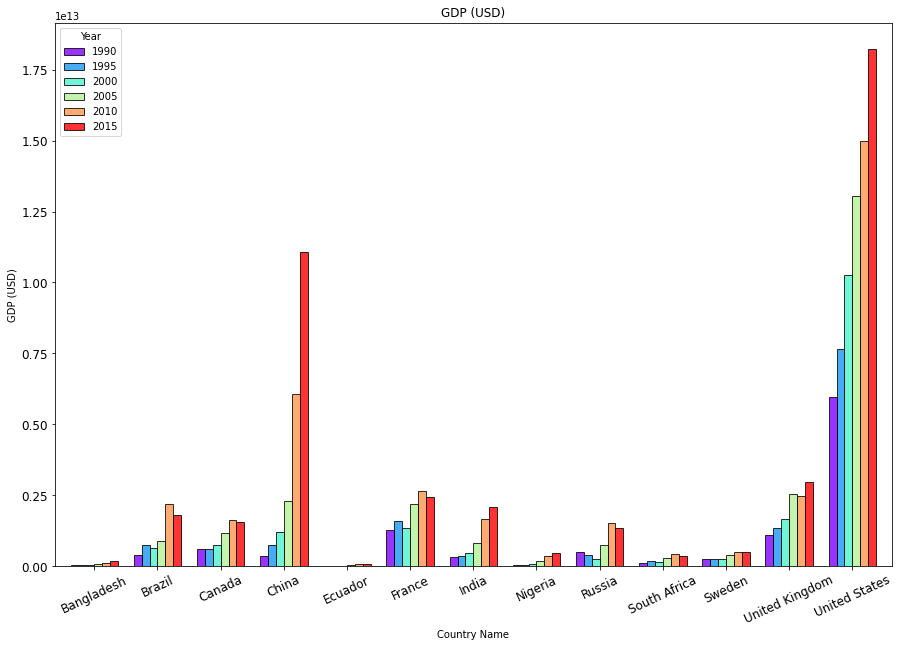

In [71]:
tot_gdp.plot(kind='bar', figsize=(15,10), xlabel='Country Name', ylabel='GDP (USD)', fontsize=12, alpha=0.8, 
             stacked=False, width = 0.75, title='GDP (USD)', colormap='rainbow', edgecolor='black', rot=25)

<AxesSubplot:title={'center':'Greenhouse gas emission by countries'}, xlabel='Country Name', ylabel='KT of CO2 equivalent'>

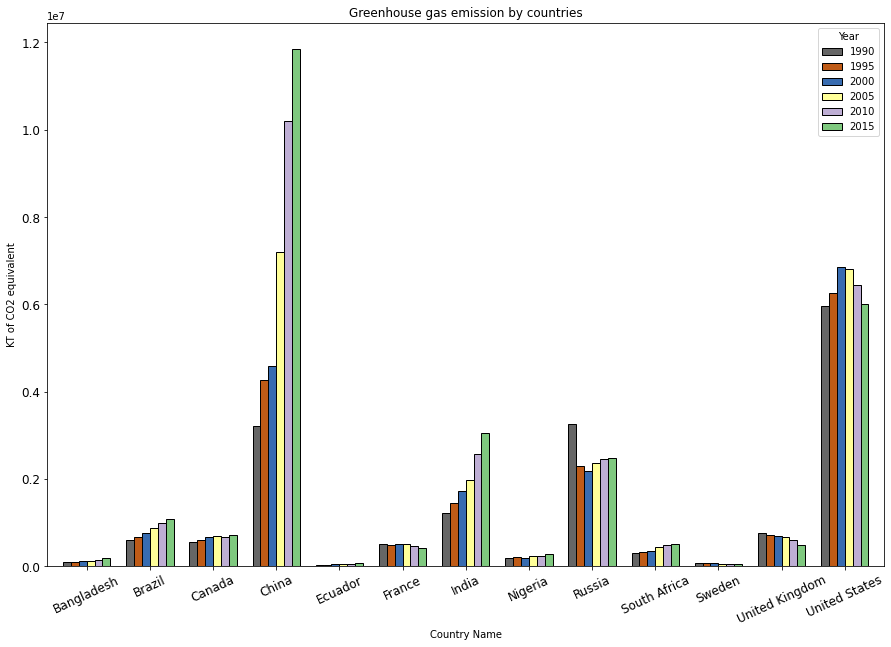

In [73]:
tot_emission.plot(kind='bar', figsize=(15,10), xlabel='Country Name', ylabel='KT of CO2 equivalent', fontsize=12, alpha=1.0, 
                                stacked=False, width = 0.75, title='Greenhouse gas emission by countries', 
                                colormap='Accent_r', edgecolor='black', rot=25)

In [37]:
#plt.scatter(df_urban.drop('World'), df_forest.drop('World'))

In [38]:
tot_emission.corrwith(tot_gdp, axis=1)

Country Name
Bangladesh        0.977238
Brazil            0.871741
Canada            0.753919
China             0.949859
Ecuador           0.960546
France           -0.669921
India             0.983036
Nigeria           0.897058
Russia           -0.008818
South Africa      0.974697
Sweden           -0.889807
United Kingdom   -0.886152
United States     0.056652
dtype: float64

In [39]:
# France, Russia, Sweden and the UK total greenhouse gas emission has negative correlations with the total GDP.
# The US doesn't have any correlation between the two factors.
# The rest of the countries from the list have strong correlations.

In [40]:
df_urban.corrwith(df_forest, axis=1)

Country Name
Bangladesh       -0.952714
Brazil           -0.986499
Canada           -0.969458
China             0.998542
Ecuador          -0.242460
France            0.996876
India             0.974893
Nigeria          -0.994811
Russia            0.772324
South Africa     -0.999853
Sweden            0.720512
United Kingdom    0.949806
United States     0.917218
dtype: float64

In [41]:
import scipy.stats as stats
(stats.describe(df_urban.T).mean)

stats.describe(df_urban.T)

DescribeResult(nobs=13, minmax=(array([ 5.135, 46.139, 69.061, 16.203, 33.878, 61.88 , 17.924, 15.41 ,
       53.731, 46.619, 72.49 , 77.117, 69.996]), array([38.177, 87.073, 81.562, 61.428, 64.166, 80.975, 34.926, 51.958,
       74.754, 67.354, 87.977, 83.903, 82.664])), mean=array([19.69015385, 70.91846154, 77.14230769, 31.79053846, 51.95807692,
       73.91015385, 25.61046154, 30.47546154, 69.11892308, 54.22553846,
       82.64246154, 79.29430769, 76.46238462]), variance=array([117.21730297, 194.23934894,  13.04622073, 248.72541994,
       120.26802274,  26.59293814,  29.2423156 , 151.7825756 ,
        47.19833408,  52.59532694,  16.09899244,   4.2582099 ,
        16.25669659]), skewness=array([ 0.18699953, -0.46932682, -0.67230484,  0.68235762, -0.41197138,
       -0.89348068,  0.1731919 ,  0.36846478, -1.21419859,  0.57782546,
       -1.32932763,  1.1940798 ,  0.10293827]), kurtosis=array([-1.10737409, -1.13847645, -0.03400527, -0.9502639 , -1.34858747,
        0.48500615, -1.0605

In [42]:
df_urban.mean(axis=1)

Country Name
Bangladesh        19.690154
Brazil            70.918462
Canada            77.142308
China             31.790538
Ecuador           51.958077
France            73.910154
India             25.610462
Nigeria           30.475462
Russia            69.118923
South Africa      54.225538
Sweden            82.642462
United Kingdom    79.294308
United States     76.462385
dtype: float64

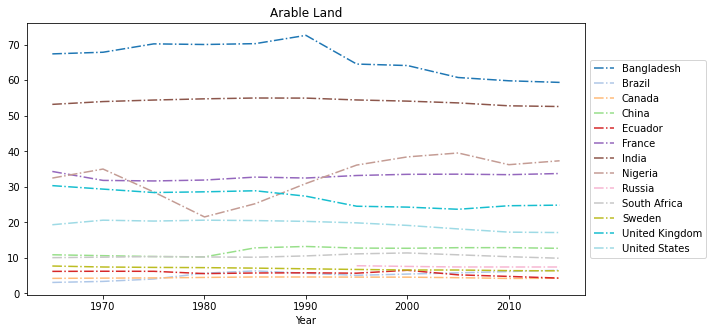

In [79]:
df_arable.T.reset_index().plot('Year', countries_of_interest[:], linestyle ='-.', figsize=(10,5), 
                               title='Arable Land', cmap='tab20')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [98]:
df_forest.T.iloc[:, :]

Country Name,Bangladesh,Brazil,Canada,China,Ecuador,France,India,Nigeria,Russia,South Africa,Sweden,United Kingdom,United States
Year,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,14.752478,70.458021,38.845512,16.673325,52.854392,26.363945,21.504848,29.124905,49.356465,14.955271,68.389628,11.482660,33.022308
1995,14.752470,68.196190,38.819247,17.726847,51.225816,27.141934,22.119172,28.228384,49.401052,14.805241,68.511478,11.846402,33.081594
2000,14.752463,65.934359,38.792982,18.780497,55.284667,27.919871,22.733495,27.331862,49.401850,14.655211,68.633328,12.210143,33.130174


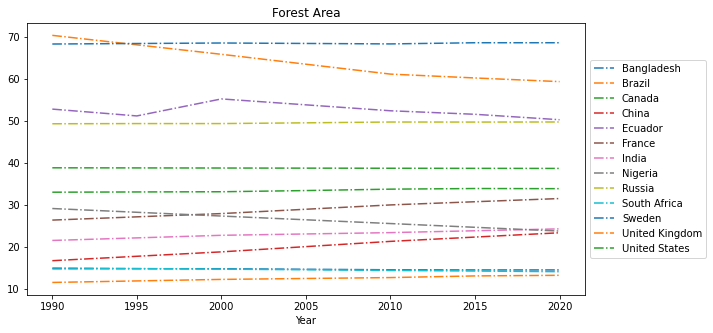

In [100]:
df_forest.T.reset_index().plot('Year', countries_of_interest, linestyle ='-.', figsize=(10,5), title='Forest Area')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [45]:
df_urban.max(axis=1)

Country Name
Bangladesh        38.177
Brazil            87.073
Canada            81.562
China             61.428
Ecuador           64.166
France            80.975
India             34.926
Nigeria           51.958
Russia            74.754
South Africa      67.354
Sweden            87.977
United Kingdom    83.903
United States     82.664
dtype: float64

In [46]:
from sklearn.preprocessing import StandardScaler

df_urban_norm = StandardScaler().fit_transform(df_urban)

(array([[1., 0., 3., 0., 1., 1., 2., 1., 2., 2.],
        [1., 0., 3., 0., 1., 1., 1., 1., 3., 2.],
        [1., 0., 3., 0., 1., 1., 1., 1., 3., 2.],
        [1., 1., 2., 0., 1., 1., 1., 1., 4., 1.],
        [0., 2., 2., 0., 0., 2., 0., 2., 4., 1.],
        [0., 3., 1., 0., 0., 2., 0., 2., 4., 1.],
        [1., 2., 1., 0., 0., 2., 0., 0., 6., 1.],
        [1., 1., 2., 0., 0., 2., 0., 1., 5., 1.],
        [1., 1., 2., 0., 0., 2., 0., 2., 4., 1.],
        [2., 0., 2., 0., 0., 2., 0., 2., 4., 1.],
        [2., 0., 1., 1., 0., 2., 0., 2., 5., 0.],
        [2., 0., 1., 0., 1., 2., 0., 2., 4., 1.],
        [2., 0., 1., 0., 1., 2., 1., 1., 4., 1.]]),
 array([-1.9631699 , -1.62908312, -1.29499635, -0.96090957, -0.62682279,
        -0.29273601,  0.04135077,  0.37543755,  0.70952432,  1.0436111 ,
         1.37769788]),
 <a list of 13 BarContainer objects>)

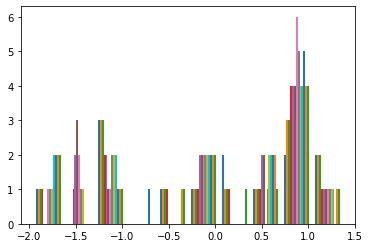

In [105]:
plt.hist(df_urban_norm)

In [63]:
import seaborn as sns

In [52]:
df_brazil.T.corr()

,Rural population (% of total),Urban population (% of total),Forest area,Arable land,Manufacturing revenue,GDP
Rural population (% of total),1.000000,-1.000000,0.986499,-0.842993,0.695785,-0.816648
Urban population (% of total),-1.000000,1.000000,-0.986499,0.842993,-0.695785,0.816648
Forest area,0.986499,-0.986499,1.000000,-0.795422,0.859381,-0.839954
Arable land,-0.842993,0.842993,-0.795422,1.000000,-0.267270,0.623654
Manufacturing revenue,0.695785,-0.695785,0.859381,-0.267270,1.000000,-0.787414
GDP,-0.816648,0.816648,-0.839954,0.623654,-0.787414,1.000000


In [55]:
def df_country_specific(country, colormap):
    """
    The function takes in a country name from the countries_of_interest list 
    and returns a heatmap of the variables/features 
    """
    
    x1 = df_rural.loc[country].reset_index().iloc[:, 1]
    x2 = df_urban.loc[country].reset_index().iloc[:, 1]
    x3 = df_forest.loc[country].reset_index().iloc[:, 1]
    x4 = df_arable.loc[country].reset_index().iloc[:, 1]
    x5 = df_manufacturing.loc[country].reset_index().iloc[:, 1]
    x6 = df_gdp.loc[country].reset_index().iloc[:, 1]
    
    df_country = pd.DataFrame([x1, x2, x3, x4, x5, x6])
    df_country.index = ['Rural population (% of total)', 'Urban population (% of total)', 'Forest area', 'Arable land', 
                        'Manufacturing revenue', 'GDP']
    df_country.columns = ['1960','1965', '1970', '1975', '1980','1985', '1990', '1995','2000', '2005', '2010', '2015', '2020'] 
    
    plt.figure(figsize=(10,8))
    
    sns.heatmap(df_country.T.corr(), annot=True, cmap=colormap, alpha=0.9, linecolor='black', linewidths = 0.1)
    
    plt.suptitle(country, x=0.45, y=0.95)
    
    plt.show()
    
    return ()

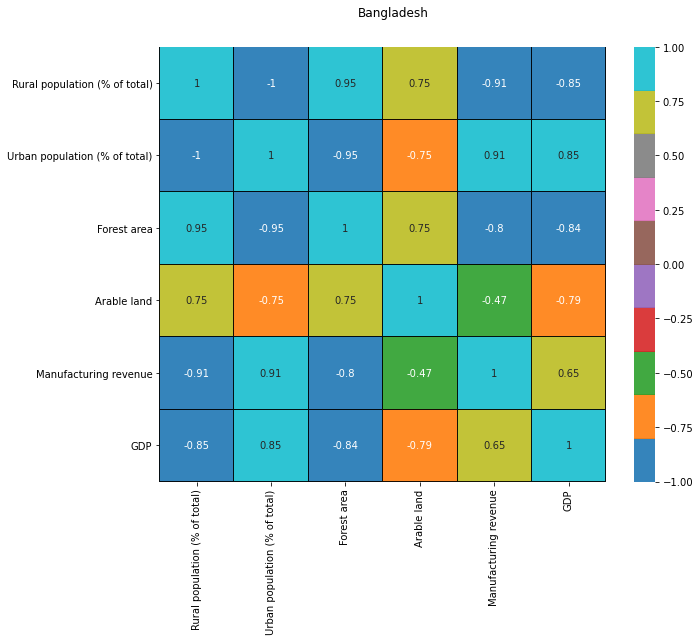

In [56]:
df_bangladesh = df_country_specific('Bangladesh', 'tab10')

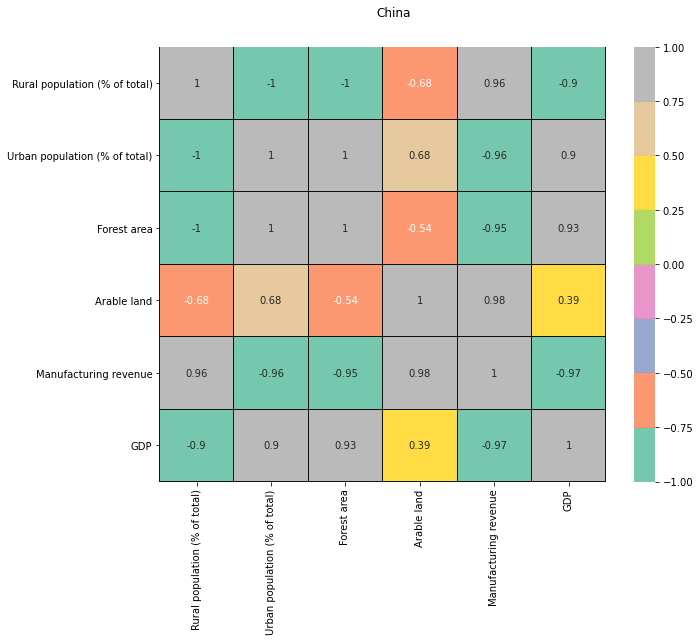

In [57]:
df_china = df_country_specific('China', 'Set2')

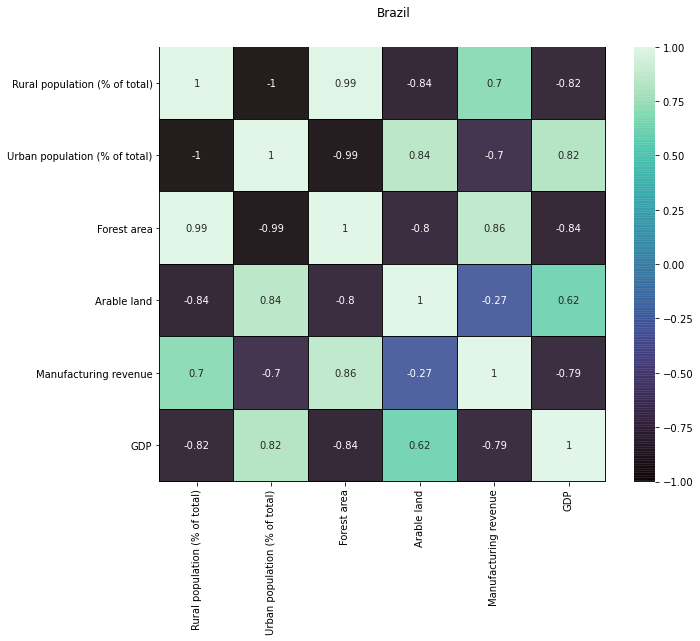

()

In [58]:
df_country_specific('Brazil', 'mako')